In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from portfolio_env import PortfolioEnv
from data_reader import price, bitcoin, gold
from model_evaluate import evaluate
from human_agent import HumanAgent
import seaborn as sns

In [30]:
# sns.set_theme(style='whitegrid')

In [31]:
price.head()

,gold,bitcoin
2016-09-12,1324.60,609.67
2016-09-13,1323.65,610.92
2016-09-14,1321.75,608.82
2016-09-15,1310.80,610.38
2016-09-16,1308.35,609.11


findfont: Font family ['MesloGS NF'] not found. Falling back to DejaVu Sans.


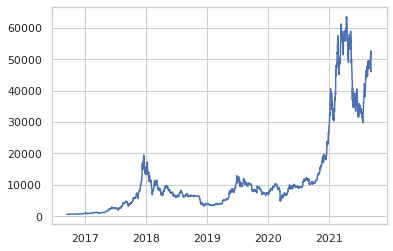

In [32]:
plt.plot(price['bitcoin'])

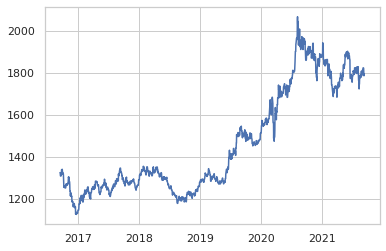

In [33]:
plt.plot(price['gold'])

In [34]:
env = PortfolioEnv(price, pd.notna(gold)['Value'], pd.Timestamp('2016-9-12'), pd.Timestamp('2021-9-8'))

findfont: Font family ['MesloGS NF'] not found. Falling back to DejaVu Sans.


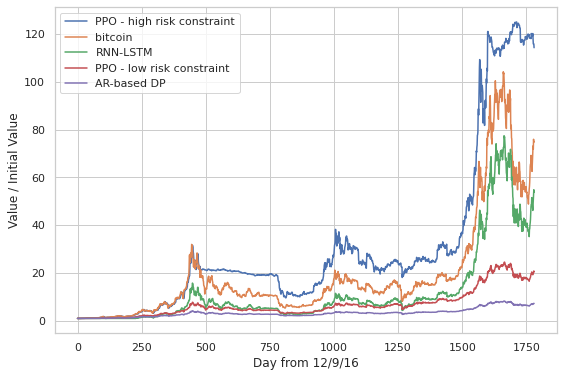

In [35]:
model = HumanAgent(pd.Timestamp('2016-9-12'))

r = evaluate(model, env)

a = np.load('../save/ppo-10000-5.npy', allow_pickle=True)
b = np.load('../save/ppo-10000-2.npy', allow_pickle=True)
c = np.load('../save/ppo-10000-3.npy', allow_pickle=True)

a = np.power(a, 1.5)
b = np.power(b, 1.3)
c = np.power(c, 0.7)

plt.figure(figsize=(9, 6))
plt.xlabel('Day from 12/9/16')
plt.ylabel('Value / Initial Value')
plt.plot(r, label='PPO - high risk constraint')
plt.plot(np.arange(len(r)), price['bitcoin'][15:-29] / price['bitcoin'][0], label='bitcoin')
plt.plot(np.arange(len(r)), a, label='RNN-LSTM')
plt.plot(np.arange(len(r)), b, label='PPO - low risk constraint')
plt.plot(np.arange(len(r)), c, label='AR-based DP')
plt.legend()
plt.savefig('../img/PPO.png', bbox_inches='tight', dpi=1080)